In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IP/Project/Classification_data_trimmed.csv')

In [ ]:
df

,Choral ID,Event number,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Bass,Meter,Chord label
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5188,015505b_,105,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,G,4,G_m
5189,015505b_,106,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,G,3,G_m
5190,015505b_,107,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,C,5,C_M
5191,015505b_,108,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,YES,NO,C,3,C_M


In [ ]:
Y = df['Chord label']
Y

0       F_M
1       C_M
2       C_M
3       F_M
4       F_M
       ... 
5188    G_m
5189    G_m
5190    C_M
5191    C_M
5192    F_M
Name: Chord label, Length: 5193, dtype: object

In [ ]:
X = df.drop(['Choral ID', 'Event number', 'Chord label'], axis=1)
X

,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Bass,Meter
0,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3
1,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5
2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2
3,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3
4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5188,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,G,4
5189,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,G,3
5190,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,C,5
5191,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,YES,NO,C,3


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=42, shuffle=True,stratify=Y)

In [ ]:
oe = OrdinalEncoder()
oe.fit(X_train)

OrdinalEncoder()

In [ ]:
X_train_transform = oe.transform(X_train)
X_test_transform = oe.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=10, random_state=42)

In [ ]:
X_resampled, y_resampled = smote.fit_resample(X_train_transform, y_train)

In [ ]:
class ele:
	def _init_(self):

		self.count = 0
		self.index = 0
		self.val = 0


def mycomp(a):
	return a.val

def mycomp2(a):
	return (a.count, -a.index)


def sortByFrequency(arr, n,):
	element = [None for _ in range(n)]
	for i in range(n):
		element[i] = ele()
		element[i].index = i
		element[i].count = 0
		element[i].val = arr[i]
	element.sort(key=mycomp)
	element[0].count = 1

	for i in range(1, n):
		if (element[i].val == element[i - 1].val):
			element[i].count += element[i - 1].count + 1
			element[i - 1].count = -1
			element[i].index = element[i - 1].index
		else:
			element[i].count = 1

	element.sort(key=mycomp2)

	index = 0
	for i in range(n - 1, -1, -1):
		if (element[i].count != -1):
			for j in range(element[i].count):
				arr[index] = element[i].val
				index += 1

#plt_array = Y.tolist()
#sortByFrequency(plt_array, len(plt_array))

# This code is contributed by phasing17 from geeksforgeeks.com

In [ ]:
plt_array = y_resampled.tolist()
sortByFrequency(plt_array, len(plt_array))

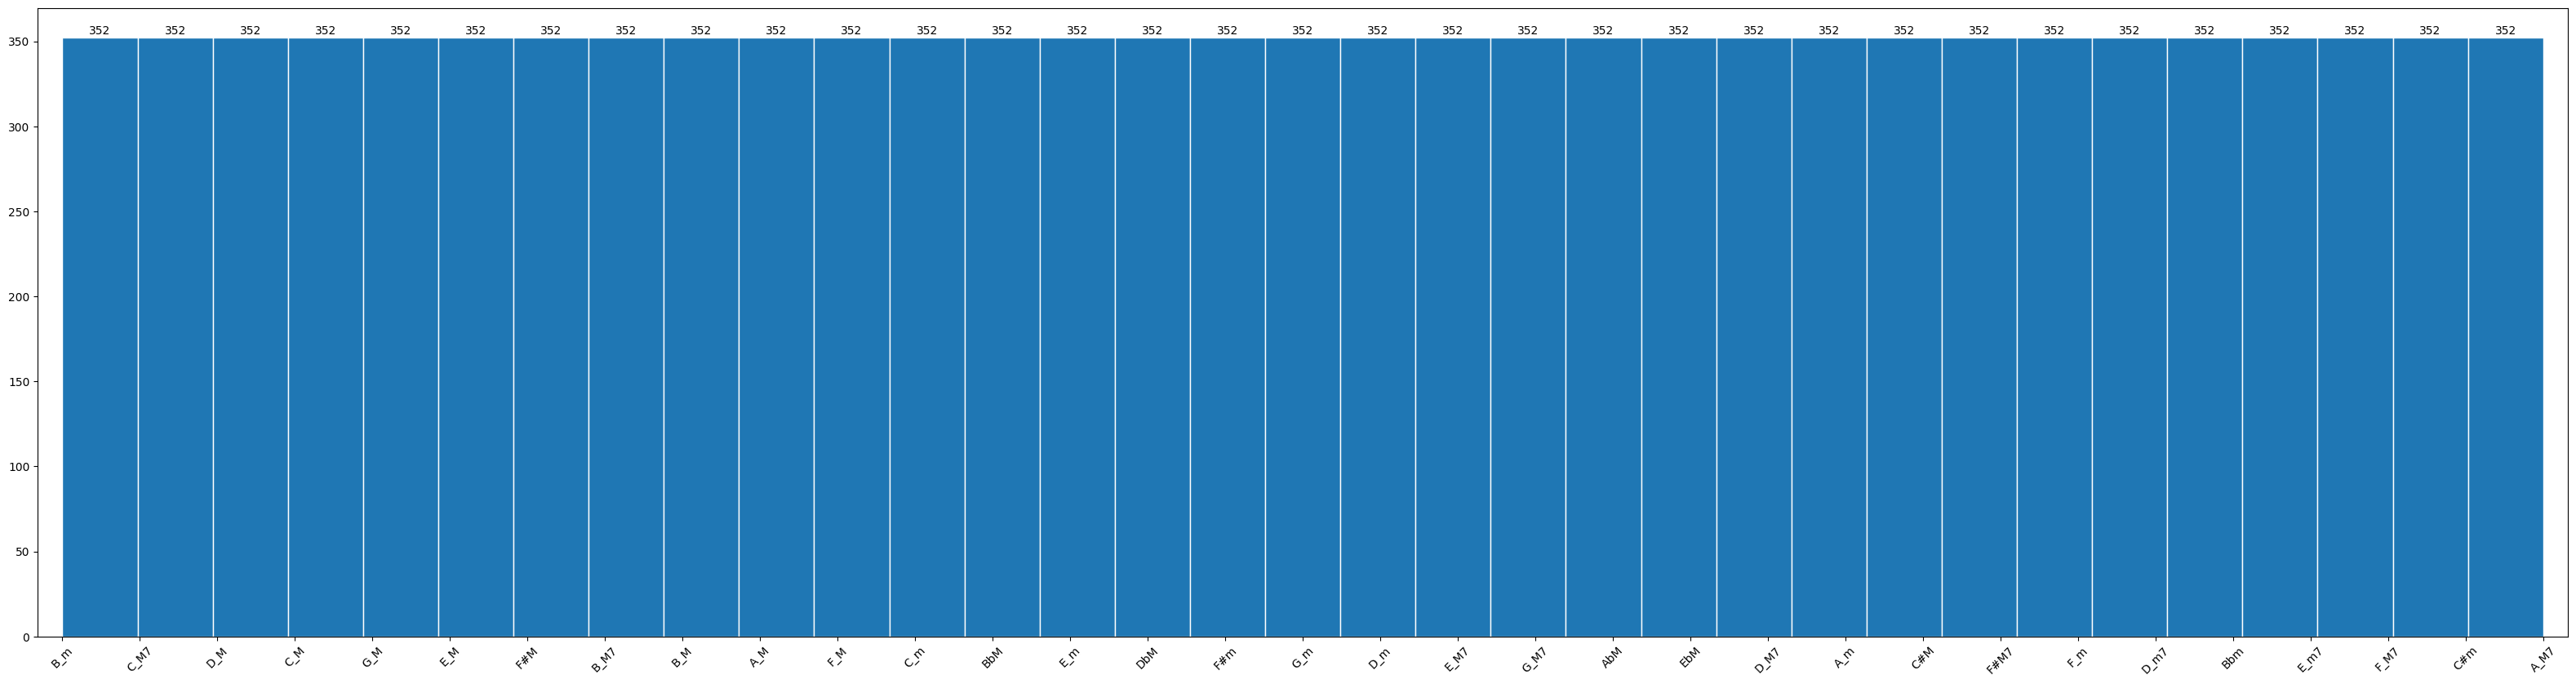

In [ ]:
plt.figure(figsize=(40,10))
plt.xticks(rotation=45)
plt.margins(x=0.01)
freq, bins, _ = plt.hist(pd.Series(plt_array), edgecolor='white', bins=pd.Series(plt_array).unique().size)
bin_centers = np.diff(bins)*0.5 + bins[:-1]

for fr, x in zip(freq, bin_centers):
    height = int(fr)
    plt.annotate("{}".format(height),
               xy = (x, height),             
               xytext = (0,1),             
               textcoords = "offset points", 
               ha = 'center', va = 'bottom'
               )
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [ ]:
model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [ ]:
train_predict = model.predict(X_resampled)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
train_acc = accuracy_score(y_resampled,train_predict)

In [ ]:
test_predict = model.predict(X_test_transform)

In [ ]:
test_acc = accuracy_score(y_test,test_predict)

In [ ]:
testCfmMatrix = confusion_matrix(y_test, test_predict)
testCfmMatrix

array([[ 86,   7,   2, ...,   0,   0,   0],
       [  4,   6,   0, ...,   0,   0,   0],
       [  2,   2,  59, ...,   2,   0,   0],
       ...,
       [  0,   0,   1, ..., 124,   3,   0],
       [  0,   0,   0, ...,   0,  12,   0],
       [  0,   0,   0, ...,   1,   0,  44]])

In [ ]:
len(testCfmMatrix)

33

In [ ]:
cfm_df = pd.DataFrame(testCfmMatrix,columns=pd.Series(plt_array).unique(), index=pd.Series(plt_array).unique())
cfm_df.head()

,B_m,C_M7,D_M,C_M,G_M,E_M,F#M,B_M7,B_M,A_M,...,A_m,C#M,F#M7,F_m,D_m7,Bbm,E_m7,F_M7,C#m,A_M7
B_m,86,7,2,0,0,0,1,0,0,0,...,0,0,0,3,0,0,0,0,0,0
C_M7,4,6,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
D_M,2,2,59,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,2,0,0
C_M,0,0,0,8,0,0,0,0,0,0,...,2,0,0,0,0,0,1,0,0,0
G_M,1,0,0,0,36,1,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0


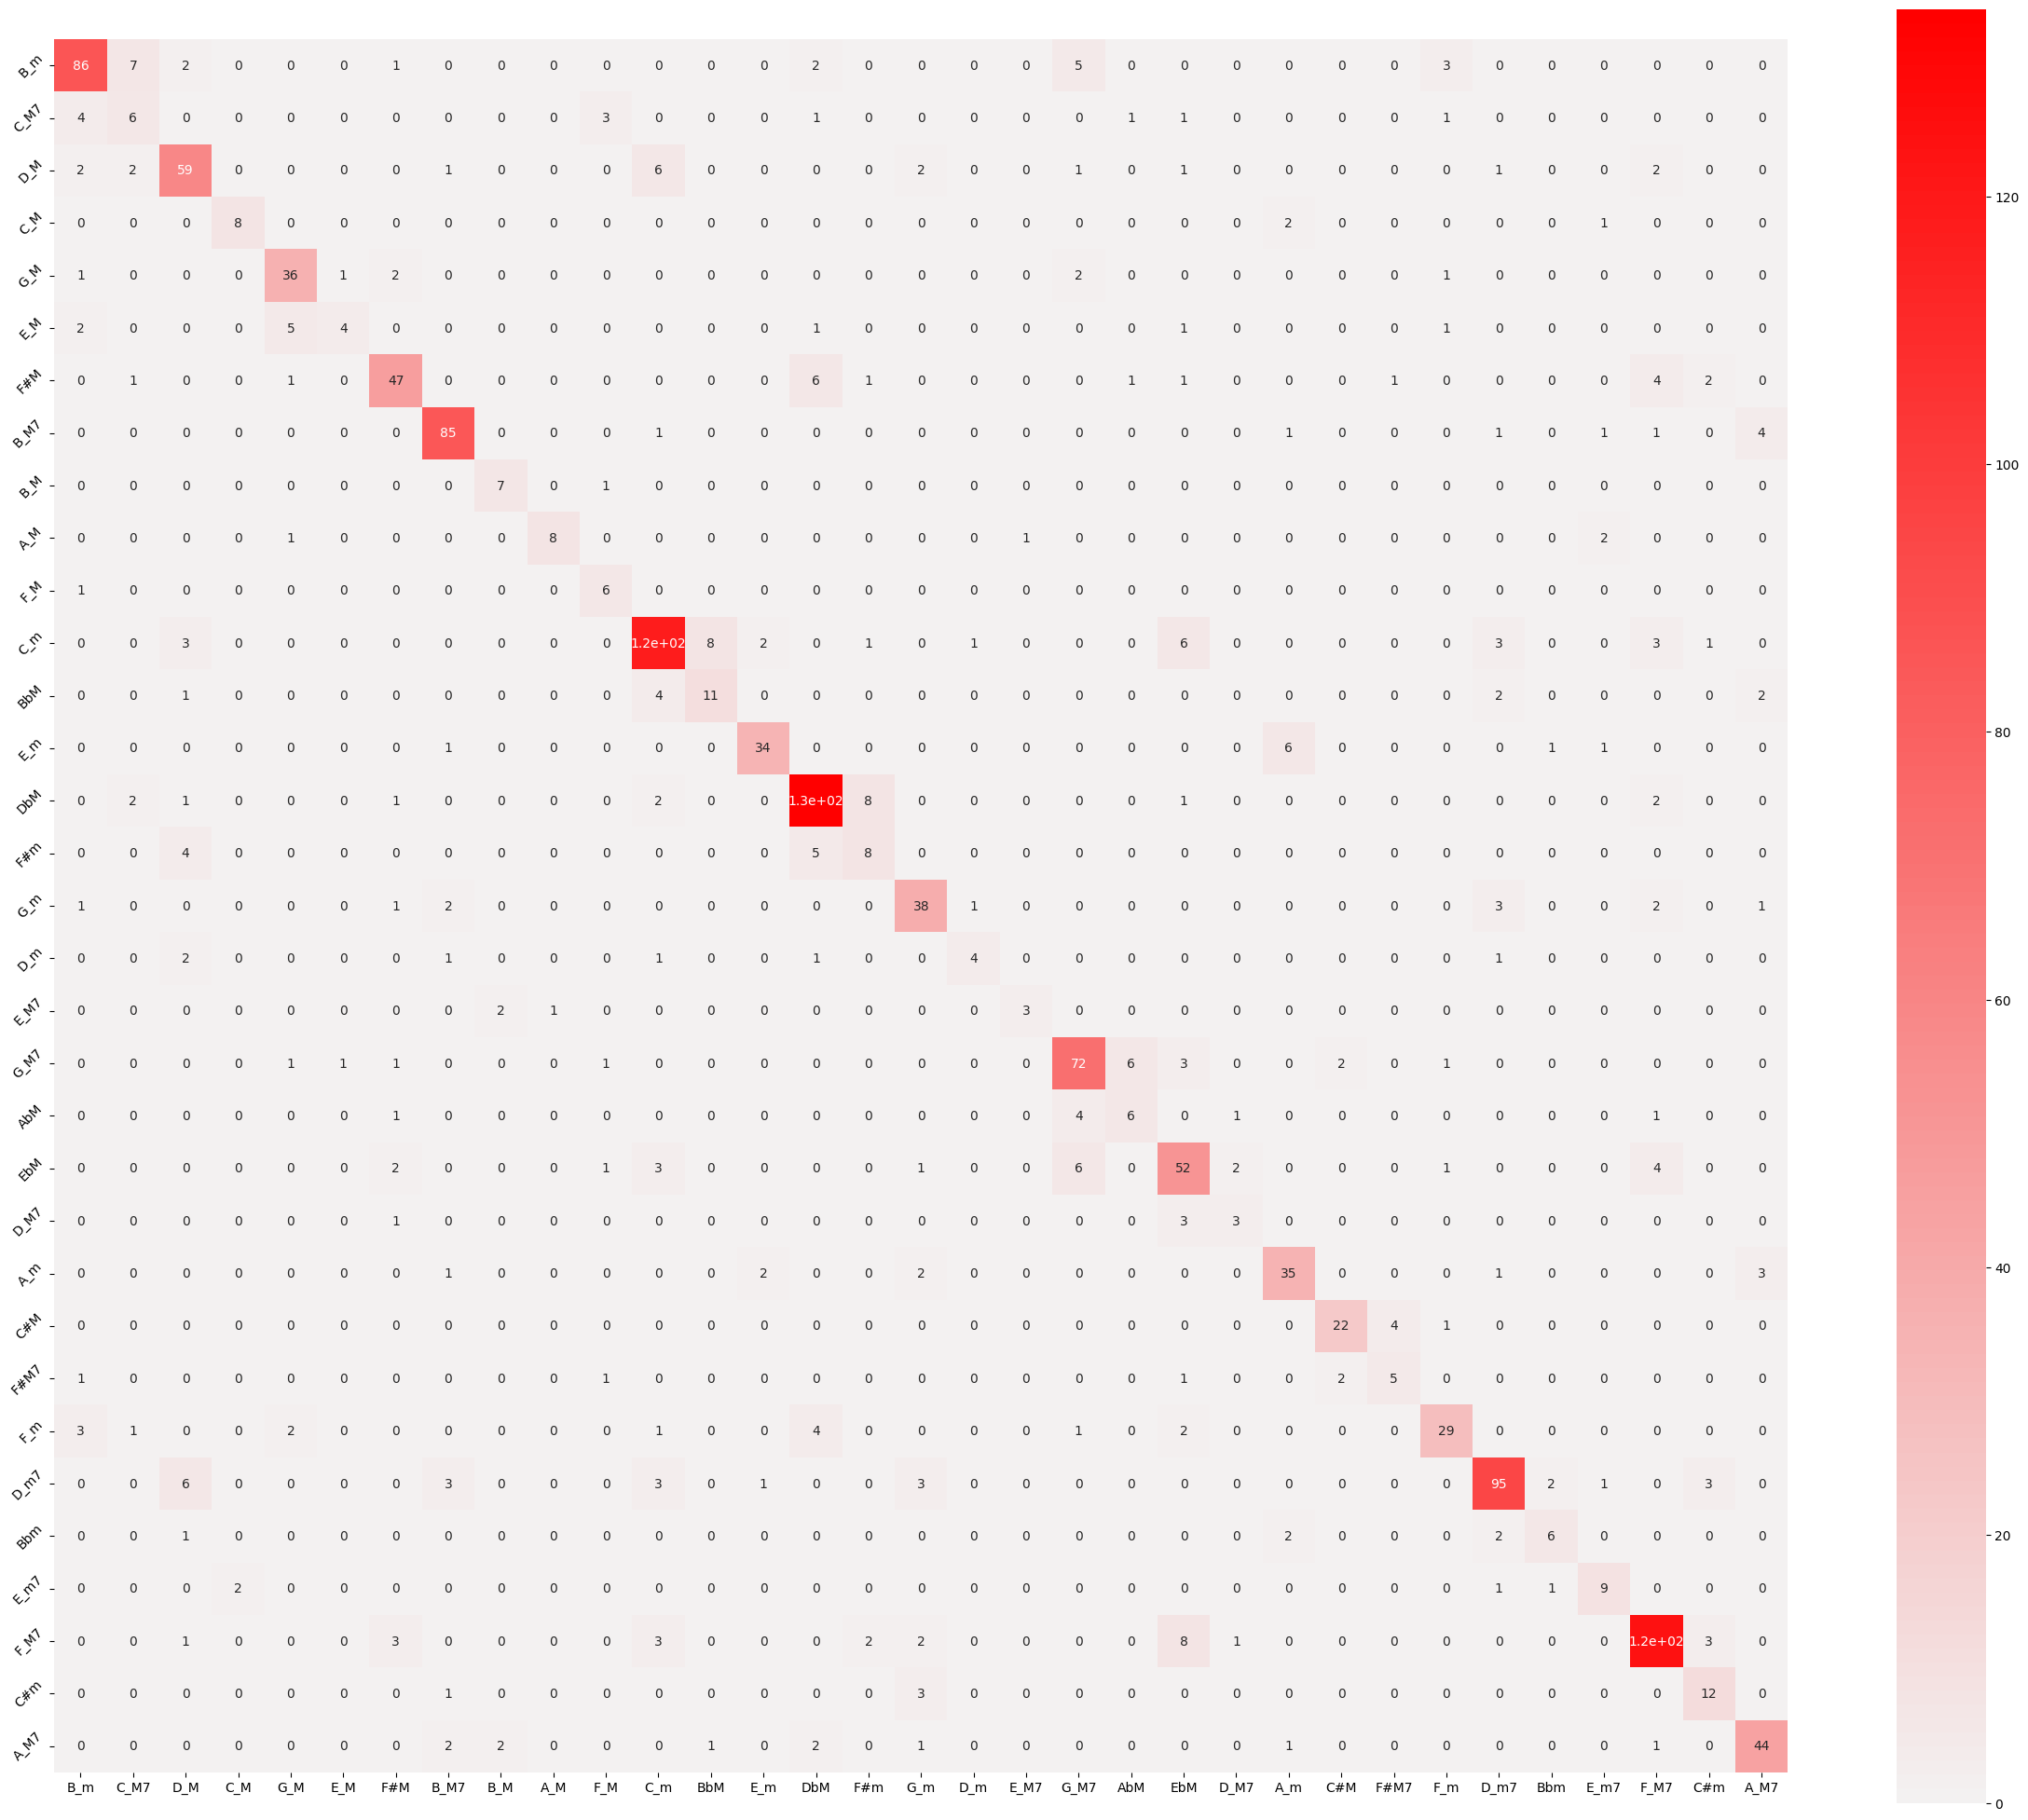

In [ ]:
import seaborn as sns
import numpy as np

corr = cfm_df
mask = np.triu(np.ones_like(corr, dtype=bool),k=corr.shape[0])

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=250, l=50, center="light", as_cmap=True)

plt.figure(figsize=(30, 25))
sns.heatmap(corr, mask=mask, center=0, annot=True, square=True, cmap=cmap)
plt.yticks(rotation=45, ha='right')

plt.show();

In [ ]:
train_acc

0.9634125344352618

In [ ]:
test_acc

0.7804878048780488

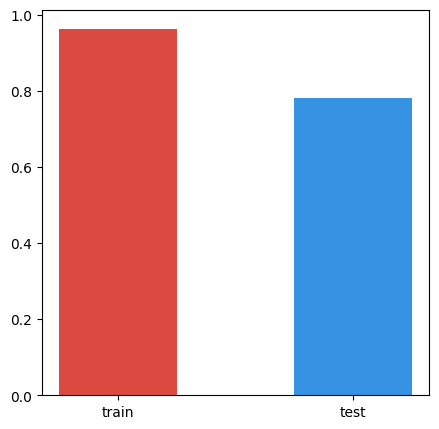

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(['train', 'test'], [train_acc,test_acc], color=['#db4a40', '#3692e3'], width=0.5, label='accuracy comparison')
plt.show()

In [ ]:
import pickle
import os

currDirPath = "./drive/MyDrive/Colab Notebooks/IP/Project/ModelsExport"

models = [model]
names = ['SMOTE_RandomForest_model.pkl']
for model, name in zip(models, names):
  try:
    with open(os.path.join(currDirPath,name),'wb') as file:
      pickle.dump(model,file)
  except IOError as err:
    print('Error while exporting model \'{}\''.format(name.split('.')[0]))
    print(err)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IP/Project/jsbach_chorals_harmony.data')

In [ ]:
df.head()

,Choral ID,Event number,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Bass,Meter,Chord label
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M


In [ ]:
np.unique(df.iloc[:]['Chord label'])

array(['A#d', 'A#d7', 'A_M', 'A_M4', 'A_M6', 'A_M7', 'A_d', 'A_m', 'A_m4',
       'A_m6', 'A_m7', 'AbM', 'Abd', 'Abm', 'B_M', 'B_M4', 'B_M7', 'B_d',
       'B_d7', 'B_m', 'B_m6', 'B_m7', 'BbM', 'BbM7', 'Bbd', 'Bbm', 'Bbm6',
       'C#M', 'C#M4', 'C#M7', 'C#d', 'C#d6', 'C#d7', 'C#m', 'C#m7', 'C_M',
       'C_M4', 'C_M6', 'C_M7', 'C_d6', 'C_d7', 'C_m', 'C_m6', 'C_m7',
       'D#M', 'D#d', 'D#d6', 'D#d7', 'D#m', 'D_M', 'D_M4', 'D_M6', 'D_M7',
       'D_d7', 'D_m', 'D_m6', 'D_m7', 'DbM', 'DbM7', 'Dbd', 'Dbd7', 'Dbm',
       'Dbm7', 'E_M', 'E_M4', 'E_M7', 'E_d', 'E_m', 'E_m6', 'E_m7', 'EbM',
       'EbM7', 'Ebd', 'F#M', 'F#M4', 'F#M7', 'F#d', 'F#d7', 'F#m', 'F#m6',
       'F#m7', 'F_M', 'F_M4', 'F_M6', 'F_M7', 'F_d', 'F_d7', 'F_m',
       'F_m6', 'F_m7', 'G#M', 'G#d', 'G#d7', 'G#m', 'G_M', 'G_M4', 'G_M6',
       'G_M7', 'G_d', 'G_m', 'G_m6', 'G_m7'], dtype=object)

In [ ]:
mask = df['Chord label'].str.contains('[m]')
df.loc[mask, 'Chord label'] = 'Mol'
df.loc[~mask, 'Chord label'] = 'Dur'

In [ ]:
Y = df['Chord label']
Y
X = df.drop(['Choral ID', 'Event number', 'Chord label'], axis=1)
X

,C,C#/Db,D,D#/Eb,E,F,F#/Gb,G,G#/Ab,A,A#/Bb,B,Bass,Meter
0,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3
1,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5
2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2
3,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3
4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,G,4
5661,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,G,3
5662,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,C,5
5663,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,YES,NO,C,3


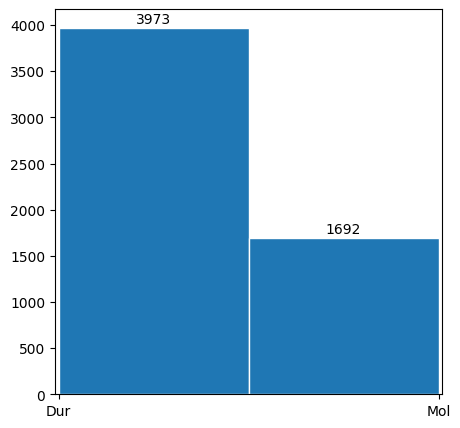

In [ ]:
plt_array = Y.tolist()
sortByFrequency(plt_array, len(plt_array))

plt.figure(figsize=(5,5))
plt.margins(x=0.01)
freq, bins, _ = plt.hist(pd.Series(plt_array), edgecolor='white', bins=pd.Series(plt_array).unique().size)
bin_centers = np.diff(bins)*0.5 + bins[:-1]

for fr, x in zip(freq, bin_centers):
    height = int(fr)
    plt.annotate("{}".format(height),
               xy = (x, height),             
               xytext = (0,1),             
               textcoords = "offset points", 
               ha = 'center', va = 'bottom'
               )
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=42, shuffle=True,stratify=Y)

In [ ]:
X_train.shape

(3965, 14)

In [ ]:
oe = OrdinalEncoder()
oe.fit(X_train)

OrdinalEncoder()

In [ ]:
X_train_transform = oe.transform(X_train)
X_test_transform = oe.transform(X_test)

In [ ]:
smote = SMOTE(k_neighbors=20, random_state=42, sampling_strategy='minority')

In [ ]:
X_resampled, y_resampled = smote.fit_resample(X_train_transform, y_train)

In [ ]:
X_resampled.shape

(5562, 14)

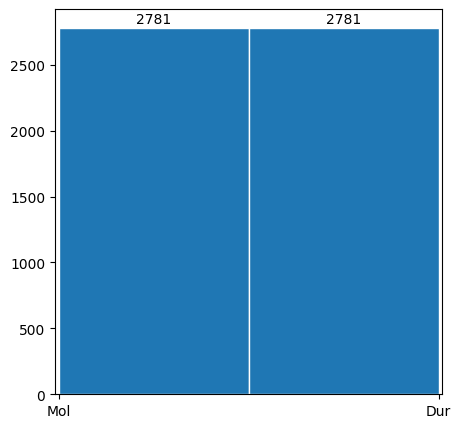

In [ ]:
plt_array = y_resampled.tolist()
sortByFrequency(plt_array, len(plt_array))

plt.figure(figsize=(5,5))
plt.margins(x=0.01)
freq, bins, _ = plt.hist(pd.Series(plt_array), edgecolor='white', bins=pd.Series(plt_array).unique().size)
bin_centers = np.diff(bins)*0.5 + bins[:-1]

for fr, x in zip(freq, bin_centers):
    height = int(fr)
    plt.annotate("{}".format(height),
               xy = (x, height),             
               xytext = (0,1),             
               textcoords = "offset points", 
               ha = 'center', va = 'bottom'
               )
plt.show()

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [ ]:
train_predict = model.predict(X_resampled)
train_acc = accuracy_score(y_resampled, train_predict)

In [ ]:
test_predict = model.predict(X_test_transform)
test_acc = accuracy_score(y_test, test_predict)

In [ ]:
train_acc

0.9572096368212873

In [ ]:
test_acc

0.8988235294117647

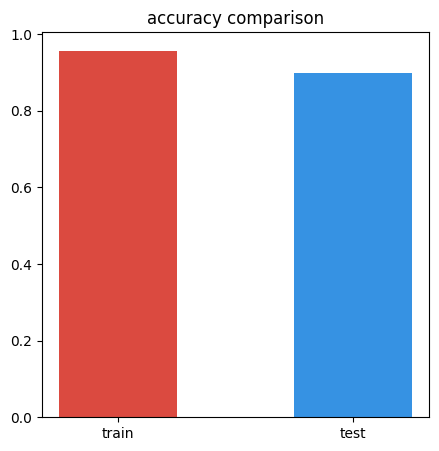

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(['train', 'test'], [train_acc,test_acc], color=['#db4a40', '#3692e3'], width=0.5, label='accuracy comparison')
plt.title('accuracy comparison')
plt.show()

In [ ]:
testCfmMatrix = confusion_matrix(y_test, test_predict)
testCfmMatrix

cfm_df = pd.DataFrame(testCfmMatrix, columns=['Dur', 'Mol'], index=['Dur', 'Mol'])
cfm_df.head()


,Dur,Mol
Dur,1099,93
Mol,79,429


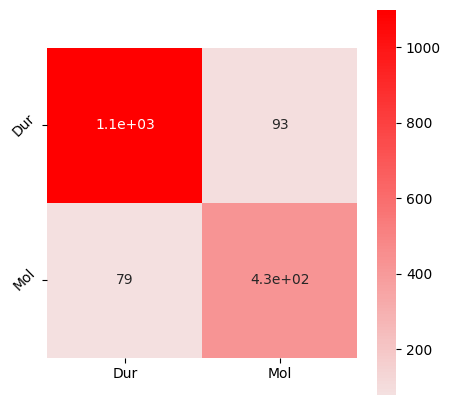

In [ ]:
corr = cfm_df
mask = np.triu(np.ones_like(corr, dtype=bool),k=corr.shape[0])

cmap = sns.diverging_palette(250, 15, s=250, l=60, center="light", as_cmap=True)

plt.figure(figsize=(5, 5))
sns.heatmap(corr, mask=mask, center=0, annot=True, square=True, cmap=cmap)
plt.yticks(rotation=45, ha='right')

plt.show();